In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier


In [8]:
# Checking package versions

import sklearn
import xgboost as xgb
import matplotlib
import scipy

print("Pandas version:",pd.__version__)
print("NumPy version:",np.__version__)
print("SciPy version:",scipy.__version__)
print("Matplotlib version:",matplotlib.__version__)
print("Seaborn version:",sns.__version__)
print("Sklearn version:",sklearn.__version__)
print("XGBoost version:",xgb.__version__)


Pandas version: 1.5.2
NumPy version: 1.23.2
SciPy version: 1.9.1
Matplotlib version: 3.6.2
Seaborn version: 0.12.1
Sklearn version: 1.1.2
XGBoost version: 1.7.5


In [9]:
# Loading the dataset
data = pd.read_csv('clean_df.csv')

# Defining the features and target variable
X = data.drop('price_interval', axis=1)
y = data['price_interval']

# Splitting the data into training, validation and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=39)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=39)

In [10]:
# LOGISTIC REGRESSION

# Defining the pipeline for baseline Logistic Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000, tol=0.01, solver='saga', penalty='l2', fit_intercept=True, class_weight=None, C= 0.1))
])

# Fitting the pipeline on your training data
pipeline.fit(X_train, y_train)

# Predicting on your training and test data
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Evaluating the performance of your model on training and test sets
train_report = classification_report(y_train, y_train_pred, zero_division=1)
test_report = classification_report(y_test, y_test_pred, zero_division=1)
logreg_test_score = accuracy_score(y_test, y_test_pred)

print("Classification report for training set:")
print(train_report)
print("Classification report for test set:")
print(test_report)

Classification report for training set:
              precision    recall  f1-score   support

       0-20M       0.00      0.00      0.00        78
     20M-30M       0.80      0.83      0.81      2656
     30M-40M       0.72      0.81      0.76      2669
     40M-50M       0.64      0.48      0.55       618
     50M-60M       0.81      0.09      0.16       143
        60M+       1.00      0.00      0.00        21

    accuracy                           0.75      6185
   macro avg       0.66      0.37      0.38      6185
weighted avg       0.74      0.75      0.74      6185

Classification report for test set:
              precision    recall  f1-score   support

       0-20M       1.00      0.00      0.00        22
     20M-30M       0.78      0.84      0.81       843
     30M-40M       0.69      0.75      0.72       812
     40M-50M       0.49      0.38      0.43       193
     50M-60M       1.00      0.04      0.07        54
        60M+       1.00      0.00      0.00        10

 

In [11]:
# Hyperparamter tuning for Logistic Regression

# Defining the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000))
])

# Defining the parameter grid to search over
logreg_params = {
    'logreg__penalty': ['l1', 'l2', 'elasticnet'],
    'logreg__C': [0.01, 0.1, 1, 10, 100],
    'logreg__solver': ['liblinear', 'saga'],
    'logreg__class_weight': ['balanced', None],
    'logreg__fit_intercept': [True, False],
    'logreg__tol': [0.0001, 0.001, 0.01]
}

# Performing grid search
random_search = RandomizedSearchCV(pipeline, logreg_params, cv=5, n_jobs=-1, n_iter=30)
random_search.fit(X_train, y_train)

# Printing the best parameters and best score
print("Best parameters: ", random_search.best_params_)
print()
logreg_val_score = random_search.best_score_
print("Best score: ", logreg_val_score)
print()

# Predicting on the validation set with the best estimator found by RandomizedSearchCV
y_val_pred = random_search.predict(X_val)

# Evaluating the performance of the best estimator on the validation set
val_report = classification_report(y_val, y_val_pred, zero_division=1)
print("Classification report for validation set:")
print(val_report)

KeyboardInterrupt: 

In [ ]:
# NAIVE BAYES CLASSIFIER (simple model)

# Defining the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('gnb', GaussianNB(var_smoothing = 9.905692228984932e-07))
])

# Fitting the pipeline on your training data
pipeline.fit(X_train, y_train)

# Predicting on your training and test data
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Evaluating the performance of your model on training and test sets
from sklearn.metrics import classification_report
train_report = classification_report(y_train, y_train_pred, zero_division=1)
test_report = classification_report(y_test, y_test_pred, zero_division=1)
gnb_test_score = accuracy_score(y_test, y_test_pred)

print("Classification report for training set:")
print(train_report)
print("Classification report for test set:")
print(test_report)


Classification report for training set:
              precision    recall  f1-score   support

       0-20M       0.03      0.95      0.07        78
     20M-30M       0.61      0.04      0.08      2656
     30M-40M       0.80      0.01      0.03      2669
     40M-50M       0.09      0.09      0.09       618
     50M-60M       0.04      0.35      0.07       143
        60M+       0.01      1.00      0.02        21

    accuracy                           0.06      6185
   macro avg       0.26      0.41      0.06      6185
weighted avg       0.61      0.06      0.06      6185

Classification report for test set:
              precision    recall  f1-score   support

       0-20M       0.03      0.82      0.05        22
     20M-30M       0.59      0.05      0.09       843
     30M-40M       0.42      0.01      0.01       812
     40M-50M       0.11      0.10      0.10       193
     50M-60M       0.04      0.30      0.07        54
        60M+       0.01      0.70      0.02        10

 

In [ ]:
# Hyperparamter tuning for Naive Bayes Classifier

# Defining the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('gnb', GaussianNB())
])

# Defining the parameter grid to search over
gnb_params = {
    'gnb__var_smoothing': uniform(1e-12, 1e-6),
}

# Performing grid search
random_search = RandomizedSearchCV(pipeline, gnb_params, cv=5, n_jobs=-1, n_iter=30)
random_search.fit(X_train, y_train)

# Printing the best parameters and best score
print("Best parameters: ", random_search.best_params_)
print()
gnb_val_score = random_search.best_score_
print("Best score: ", gnb_val_score)
print()

# Predicting on the validation set with the best estimator found by RandomizedSearchCV
y_val_pred = random_search.predict(X_val)

# Evaluating the performance of the best estimator on the validation set
val_report = classification_report(y_val, y_val_pred, zero_division=1)
print("Classification report for validation set:")
print(val_report)

Best parameters:  {'gnb__var_smoothing': 9.13785610804049e-07}

Best score:  0.06176232821341956

Classification report for validation set:
              precision    recall  f1-score   support

       0-20M       0.04      0.92      0.08        24
     20M-30M       0.65      0.06      0.10       650
     30M-40M       0.69      0.01      0.03       672
     40M-50M       0.07      0.07      0.07       147
     50M-60M       0.05      0.30      0.08        47
        60M+       0.01      0.71      0.02         7

    accuracy                           0.06      1547
   macro avg       0.25      0.34      0.06      1547
weighted avg       0.58      0.06      0.07      1547



In [ ]:
# RANDOM FOREST CLASSIFIER

# Defining the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(max_depth=9, n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_features='sqrt'))
])

# Fitting the pipeline on your training data
pipeline.fit(X_train, y_train)

# Predicting on your training and test data
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Evaluating the performance of your model on training and test sets
from sklearn.metrics import classification_report
train_report = classification_report(y_train, y_train_pred, zero_division=1)
test_report = classification_report(y_test, y_test_pred, zero_division=1)
rf_test_score = accuracy_score(y_test, y_test_pred)

print("Classification report for training set:")
print(train_report)
print("Classification report for test set:")
print(test_report)

Classification report for training set:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        78
           1       0.83      0.85      0.84      2656
           2       0.72      0.86      0.78      2669
           3       0.85      0.38      0.52       618
           4       1.00      0.08      0.14       143
           5       1.00      0.14      0.25        21

    accuracy                           0.77      6185
   macro avg       0.90      0.38      0.42      6185
weighted avg       0.79      0.77      0.75      6185

Classification report for test set:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        22
           1       0.79      0.84      0.81       843
           2       0.66      0.79      0.72       812
           3       0.62      0.21      0.32       193
           4       1.00      0.07      0.14        54
           5       1.00      0.00      0.00        10

 

In [ ]:
# Hyperparamter tuning for Random Forest Classifier

# Defining the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier())
])

# Defining the parameter grid to search over
rf_params = {
    'rf__n_estimators': [100, 500, 1000],
    'rf__max_depth': [10, 20, 30, None],
    'rf__max_features': ['sqrt', 'log2', None],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4]
}

# Performing grid search
random_search = RandomizedSearchCV(pipeline, rf_params, cv=5, n_jobs=-1, n_iter=30)
random_search.fit(X_train, y_train)

# Printing the best parameters and best score
print("Best parameters: ", random_search.best_params_)
print()
rf_val_score = random_search.best_score_
print("Best score: ", rf_val_score)
print()

# Predicting on the validation set with the best estimator found by RandomizedSearchCV
y_val_pred = random_search.predict(X_val)

# Evaluating the performance of the best estimator on the validation set
val_report = classification_report(y_val, y_val_pred, zero_division=1)
print("Classification report for validation set:")
print(val_report)

Best parameters:  {'rf__n_estimators': 500, 'rf__min_samples_split': 5, 'rf__min_samples_leaf': 1, 'rf__max_features': None, 'rf__max_depth': None}

Best score:  0.7894907033144707

Classification report for validation set:
              precision    recall  f1-score   support

       0-20M       0.75      0.25      0.38        24
     20M-30M       0.81      0.85      0.83       650
     30M-40M       0.79      0.78      0.78       672
     40M-50M       0.68      0.67      0.67       147
     50M-60M       0.80      0.60      0.68        47
        60M+       0.33      0.29      0.31         7

    accuracy                           0.78      1547
   macro avg       0.69      0.57      0.61      1547
weighted avg       0.78      0.78      0.78      1547



In [ ]:
# STOCHASTIC GRADIENT DESCENT CLASSIFIER (simple model)

# Defining the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('sgd', SGDClassifier(penalty= 'l1', max_iter= 10000, loss= 'hinge', learning_rate= 'optimal', alpha= 0.01))
])

# Fitting the pipeline on your training data
pipeline.fit(X_train, y_train)

# Predicting on your training and test data
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Evaluating the performance of your model on training and test sets
from sklearn.metrics import classification_report
train_report = classification_report(y_train, y_train_pred, zero_division=1)
test_report = classification_report(y_test, y_test_pred, zero_division=1)
sgd_test_score = accuracy_score(y_test, y_test_pred)

print("Classification report for training set:")
print(train_report)
print("Classification report for test set:")
print(test_report)

Classification report for training set:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        78
           1       0.79      0.85      0.82      2656
           2       0.66      0.80      0.72      2669
           3       0.50      0.01      0.02       618
           4       0.50      0.12      0.19       143
           5       1.00      0.00      0.00        21

    accuracy                           0.72      6185
   macro avg       0.57      0.30      0.29      6185
weighted avg       0.69      0.72      0.67      6185

Classification report for test set:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        22
           1       0.76      0.86      0.81       843
           2       0.63      0.75      0.68       812
           3       0.67      0.01      0.02       193
           4       0.50      0.07      0.13        54
           5       1.00      0.00      0.00        10

 

In [ ]:
# Hyperparamter tuning for Stochastic Gradient Descent

# Defining the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('sgd', SGDClassifier())
])

# Defining the parameter grid to search over
sgd_params = {
    'sgd__loss': ['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron'],
    'sgd__penalty': ['l1', 'l2', 'elasticnet'],
    'sgd__alpha': [0.0001, 0.001, 0.01],
    'sgd__max_iter': [1000, 5000, 10000],
    'sgd__learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive']
}

# Performing grid search
random_search = RandomizedSearchCV(pipeline, sgd_params, cv=5, n_jobs=-1, n_iter=30)
random_search.fit(X_train, y_train)

# Printing the best parameters and best score
print("Best parameters: ", random_search.best_params_)
print()
sgd_val_score = random_search.best_score_
print("Best score: ", sgd_val_score)
print()

# Predicting on the validation set with the best estimator found by RandomizedSearchCV
y_val_pred = random_search.predict(X_val)

# Evaluating the performance of the best estimator on the validation set
val_report = classification_report(y_val, y_val_pred, zero_division=1)
print("Classification report for validation set:")
print(val_report)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reache

Best parameters:  {'sgd__penalty': 'l1', 'sgd__max_iter': 10000, 'sgd__loss': 'hinge', 'sgd__learning_rate': 'optimal', 'sgd__alpha': 0.001}

Best score:  0.7097817299919159

Classification report for validation set:
              precision    recall  f1-score   support

       0-20M       0.71      0.21      0.32        24
     20M-30M       0.76      0.85      0.80       650
     30M-40M       0.66      0.78      0.72       672
     40M-50M       1.00      0.00      0.00       147
     50M-60M       0.54      0.30      0.38        47
        60M+       1.00      0.00      0.00         7

    accuracy                           0.71      1547
   macro avg       0.78      0.36      0.37      1547
weighted avg       0.73      0.71      0.67      1547



In [ ]:
# SUPPORT VECTOR CLASSIFIER

# Defining the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('sv', SVC(kernel= 'poly', gamma= 'scale', degree= 3, coef0= 1, C= 0.1))
])

# Fitting the pipeline on your training data
pipeline.fit(X_train, y_train)

# Predicting on your training and test data
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Evaluating the performance of your model on training and test sets
from sklearn.metrics import classification_report
train_report = classification_report(y_train, y_train_pred, zero_division=1)
test_report = classification_report(y_test, y_test_pred, zero_division=1)
sv_test_score = accuracy_score(y_test, y_test_pred)

print("Classification report for training set:")
print(train_report)
print("Classification report for test set:")
print(test_report)

Classification report for training set:
              precision    recall  f1-score   support

           0       1.00      0.04      0.07        78
           1       0.83      0.85      0.84      2656
           2       0.76      0.83      0.80      2669
           3       0.67      0.56      0.61       618
           4       0.95      0.13      0.22       143
           5       1.00      0.14      0.25        21

    accuracy                           0.79      6185
   macro avg       0.87      0.43      0.47      6185
weighted avg       0.79      0.79      0.77      6185

Classification report for test set:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        22
           1       0.79      0.84      0.81       843
           2       0.71      0.77      0.74       812
           3       0.51      0.42      0.46       193
           4       0.50      0.04      0.07        54
           5       1.00      0.00      0.00        10

 

In [ ]:
# Hyperparamter tuning for Support Vector Classifier

# Defining the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('sv', SVC())
])

# Defining the parameter grid to search over
sv_params = {
    'sv__C': [0.1, 1, 10],
    'sv__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'sv__degree': [2, 3, 4],
    'sv__gamma': ['scale', 'auto'],
    'sv__coef0': [0, 1, 2]
}

# Performing grid search
random_search = RandomizedSearchCV(pipeline, sv_params, cv=5, n_jobs=-1, n_iter=30)
random_search.fit(X_train, y_train)

# Printing the best parameters and best score
print("Best parameters: ", random_search.best_params_)
print()
sv_val_score = random_search.best_score_
print("Best score: ", sv_val_score)
print()

# Predicting on the validation set with the best estimator found by RandomizedSearchCV
y_val_pred = random_search.predict(X_val)

# Evaluating the performance of the best estimator on the validation set
val_report = classification_report(y_val, y_val_pred, zero_division=1)
print("Classification report for validation set:")
print(val_report)

Best parameters:  {'sv__kernel': 'poly', 'sv__gamma': 'scale', 'sv__degree': 4, 'sv__coef0': 2, 'sv__C': 0.1}

Best score:  0.766208569118836

Classification report for validation set:
              precision    recall  f1-score   support

       0-20M       0.78      0.29      0.42        24
     20M-30M       0.80      0.84      0.82       650
     30M-40M       0.76      0.78      0.77       672
     40M-50M       0.61      0.57      0.59       147
     50M-60M       0.85      0.36      0.51        47
        60M+       0.33      0.14      0.20         7

    accuracy                           0.76      1547
   macro avg       0.69      0.50      0.55      1547
weighted avg       0.76      0.76      0.76      1547



In [ ]:
# EXTREME GRADIENT BOOSTING CLASSIFIER

# Label Encoder for XGBClassifier
le = LabelEncoder()
y = le.fit_transform(y)

# Splitting the data into training, validation and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=39)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=39)

# Defining the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier(subsample=1, learning_rate=0.5, max_depth=3, min_child_weight=1, objective='multi:softprob', n_estimators=50))
])

# Fitting the pipeline on your training data
pipeline.fit(X_train, y_train)

# Predicting on your training and test data
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Evaluating the performance of your model on training and test sets
from sklearn.metrics import classification_report
train_report = classification_report(y_train, y_train_pred, zero_division=1)
test_report = classification_report(y_test, y_test_pred, zero_division=1)
xgb_test_score = accuracy_score(y_test, y_test_pred)

print("Classification report for training set:")
print(train_report)
print("Classification report for test set:")
print(test_report)

Classification report for training set:
              precision    recall  f1-score   support

           0       0.90      0.35      0.50        78
           1       0.84      0.85      0.84      2656
           2       0.77      0.84      0.80      2669
           3       0.77      0.60      0.68       618
           4       0.94      0.52      0.67       143
           5       0.94      0.76      0.84        21

    accuracy                           0.80      6185
   macro avg       0.86      0.65      0.72      6185
weighted avg       0.81      0.80      0.80      6185

Classification report for test set:
              precision    recall  f1-score   support

           0       0.75      0.14      0.23        22
           1       0.80      0.85      0.82       843
           2       0.73      0.76      0.74       812
           3       0.61      0.46      0.52       193
           4       0.58      0.28      0.38        54
           5       0.75      0.30      0.43        10

 

In [ ]:
# Hyperparamter tuning for eXtreme Gradient Boosting Classifier

# Defining the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier())
])

# Defining the parameter grid to search over
xgb_params = {
    'xgb__learning_rate': [0.01, 0.1, 0.5, 1],
    'xgb__max_depth': [3, 5, 7],
    'xgb__min_child_weight': [1, 3, 5],
    'xgb__subsample': [0.6, 0.8, 1.0],
    'xgb__objective': ['multi:softmax', 'multi:softprob'],
    'xgb__n_estimators': [50, 100, 200]
}

# Performing grid search
random_search = RandomizedSearchCV(pipeline, xgb_params, cv=5, n_jobs=-1, n_iter=30)
random_search.fit(X_train, y_train)

# Printing the best parameters and best score
print("Best parameters: ", random_search.best_params_)
print()
xgb_val_score = random_search.best_score_
print("Best score: ", xgb_val_score)
print()

# Predicting on the validation set with the best estimator found by RandomizedSearchCV
y_val_pred = random_search.predict(X_val)

# Evaluating the performance of the best estimator on the validation set
val_report = classification_report(y_val, y_val_pred, zero_division=1)
print("Classification report for validation set:")
print(val_report)

Best parameters:  {'xgb__subsample': 1.0, 'xgb__objective': 'multi:softprob', 'xgb__n_estimators': 50, 'xgb__min_child_weight': 1, 'xgb__max_depth': 7, 'xgb__learning_rate': 0.5}

Best score:  0.7901374292643493

Classification report for validation set:
              precision    recall  f1-score   support

           0       0.56      0.21      0.30        24
           1       0.81      0.85      0.83       650
           2       0.78      0.79      0.78       672
           3       0.67      0.62      0.64       147
           4       0.76      0.53      0.62        47
           5       0.50      0.43      0.46         7

    accuracy                           0.78      1547
   macro avg       0.68      0.57      0.61      1547
weighted avg       0.78      0.78      0.78      1547



In [ ]:
# MULTILAYER PERCEPTRON

# Defining the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(solver= 'sgd', max_iter=1000, learning_rate='adaptive', hidden_layer_sizes=(100,100), activation='relu', alpha=0.01, early_stopping=True))
])

# Fitting the pipeline on your training data
pipeline.fit(X_train, y_train)

# Predicting on your training and test data
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Evaluating the performance of your model on training and test sets
from sklearn.metrics import classification_report
train_report = classification_report(y_train, y_train_pred, zero_division=1)
test_report = classification_report(y_test, y_test_pred, zero_division=1)
mlp_test_score = accuracy_score(y_test, y_test_pred)

print("Classification report for training set:")
print(train_report)
print("Classification report for test set:")
print(test_report)

Classification report for training set:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        78
           1       0.83      0.86      0.84      2656
           2       0.77      0.83      0.80      2669
           3       0.63      0.56      0.59       618
           4       0.69      0.08      0.14       143
           5       1.00      0.00      0.00        21

    accuracy                           0.78      6185
   macro avg       0.65      0.39      0.40      6185
weighted avg       0.77      0.78      0.77      6185

Classification report for test set:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        22
           1       0.79      0.84      0.81       843
           2       0.71      0.76      0.73       812
           3       0.49      0.44      0.46       193
           4       0.33      0.02      0.04        54
           5       1.00      0.00      0.00        10

 

In [ ]:
# Hyperparamter tuning for Multilayer Perceptron

# Defining the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier())
])

# Defining the parameter grid to search over
mlp_params = {
    'mlp__hidden_layer_sizes': [(50, 50), (100,), (100, 100)],
    'mlp__activation': ['logistic', 'relu', 'identity', 'tanh'],
    'mlp__solver': ['lbfgs', 'adam', 'sgd'],
    'mlp__alpha': [0.0001, 0.001, 0.01],
    'mlp__max_iter': [200, 500, 1000],
    'mlp__learning_rate': ['constant', 'invscaling', 'adaptive']
}

# Performing grid search
random_search = RandomizedSearchCV(pipeline, mlp_params, cv=5, n_jobs=-1, n_iter=30)
random_search.fit(X_train, y_train)

# Printing the best parameters and best score
print("Best parameters: ", random_search.best_params_)
print()
mlp_val_score = random_search.best_score_
print("Best score: ", mlp_val_score)
print()

# Predicting on the validation set with the best estimator found by RandomizedSearchCV
y_val_pred = random_search.predict(X_val)

# Evaluating the performance of the best estimator on the validation set
val_report = classification_report(y_val, y_val_pred, zero_division=1)
print("Classification report for validation set:")
print(val_report)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

Best parameters:  {'mlp__solver': 'sgd', 'mlp__max_iter': 1000, 'mlp__learning_rate': 'adaptive', 'mlp__hidden_layer_sizes': (100,), 'mlp__alpha': 0.01, 'mlp__activation': 'relu'}

Best score:  0.7668552950687146

Classification report for validation set:
              precision    recall  f1-score   support

           0       0.86      0.25      0.39        24
           1       0.79      0.85      0.82       650
           2       0.76      0.76      0.76       672
           3       0.59      0.57      0.58       147
           4       0.64      0.38      0.48        47
           5       1.00      0.00      0.00         7

    accuracy                           0.75      1547
   macro avg       0.77      0.47      0.50      1547
weighted avg       0.75      0.75      0.75      1547



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


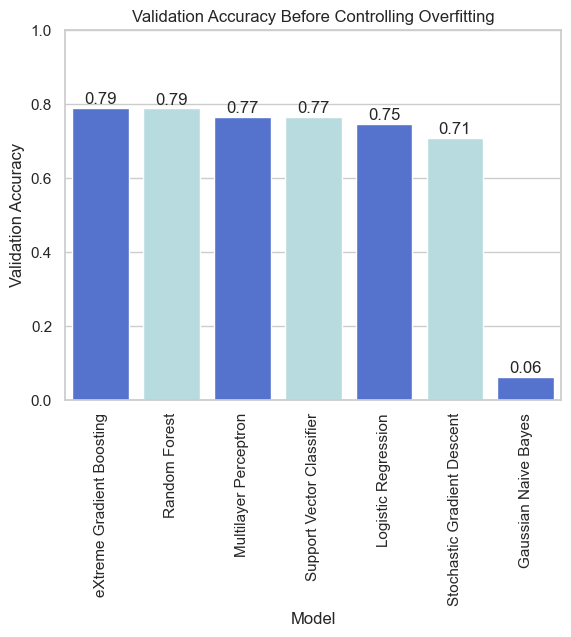

In [ ]:
# Creating a dictionary to store the model names and their corresponding scores
model_scores = {'Random Forest': rf_val_score, 
                'eXtreme Gradient Boosting': xgb_val_score, 
                'Multilayer Perceptron': mlp_val_score, 
                'Support Vector Classifier': sv_val_score, 
                'Logistic Regression': logreg_val_score, 
                'Stochastic Gradient Descent': sgd_val_score, 
                'Gaussian Naive Bayes': gnb_val_score}

# Sorting the dictionary by values in descending order
sorted_scores = dict(sorted(model_scores.items(), key=lambda item: item[1], reverse=True))

# Define the custom color palette
colors = ['royalblue', 'powderblue'] * (len(sorted_scores) // 2 + 1)

# Creating a barplot with seaborn
sns.set(style='whitegrid')
ax = sns.barplot(x=list(sorted_scores.keys()), y=list(sorted_scores.values()), palette = colors)

# Setting the y-axis limit to 0 and 1
ax.set_ylim([0, 1])

# Setting the labels and title
plt.xlabel('Model')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy Before Controlling Overfitting')

# Rotating the x-axis labels for better visibility
plt.xticks(rotation=90)

# Adding the actual score on the plot for each model, rounded to 2 decimals
for i, v in enumerate(sorted_scores.values()):
    ax.text(i, v+0.01, str(round(v,2)), horizontalalignment='center')

# Showing the plot
plt.show()


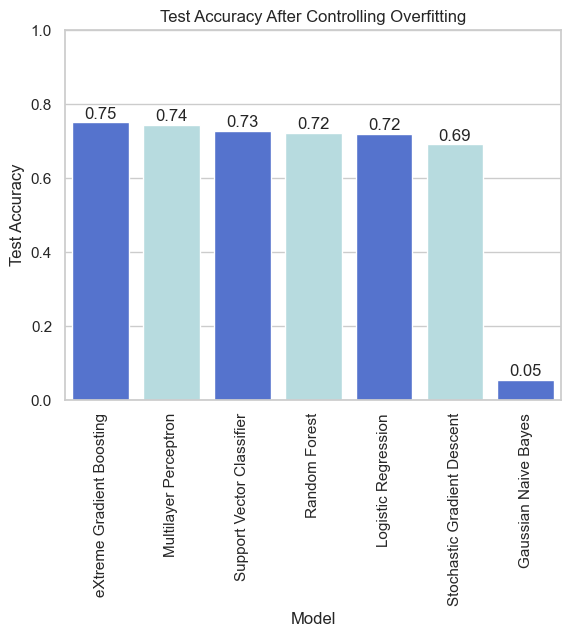

In [ ]:
# Creating a dictionary to store the model names and their corresponding scores
model_scores = {'Random Forest': rf_test_score, 
                'eXtreme Gradient Boosting': xgb_test_score, 
                'Multilayer Perceptron': mlp_test_score, 
                'Support Vector Classifier': sv_test_score, 
                'Logistic Regression': logreg_test_score, 
                'Stochastic Gradient Descent': sgd_test_score, 
                'Gaussian Naive Bayes': gnb_test_score}

# Sorting the dictionary by values in descending order
sorted_scores = dict(sorted(model_scores.items(), key=lambda item: item[1], reverse=True))

# Define the custom color palette
colors = ['royalblue', 'powderblue'] * (len(sorted_scores) // 2 + 1)

# Creating a barplot with seaborn
sns.set(style='whitegrid')
ax = sns.barplot(x=list(sorted_scores.keys()), y=list(sorted_scores.values()), palette=colors)

# Setting the y-axis limit to 0 and 1
ax.set_ylim([0, 1])

# Setting the labels and title
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy After Controlling Overfitting')

# Rotating the x-axis labels for better visibility
plt.xticks(rotation=90)

# Adding the actual score on the plot for each model, rounded to 2 decimals
for i, v in enumerate(sorted_scores.values()):
    ax.text(i, v+0.01, str(round(v,2)), horizontalalignment='center')


# Showing the plot
plt.show()


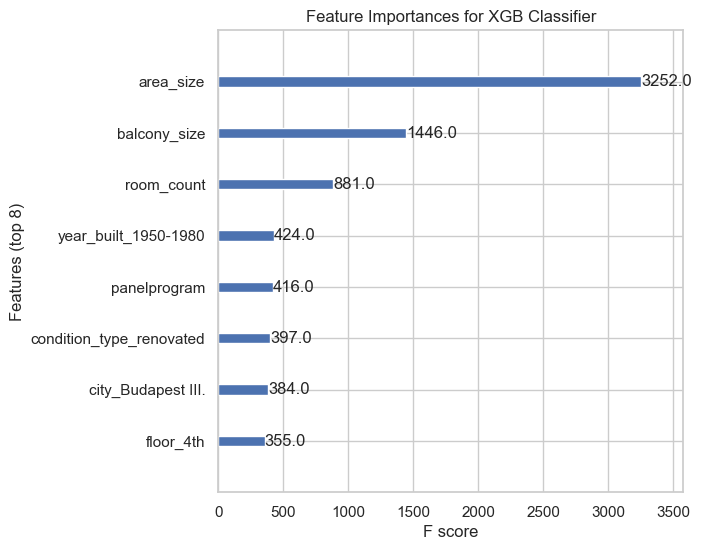

In [ ]:
# FEATURE IMPORTANCE

# train XGBClassifier model
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# plot feature importances
fig, ax = plt.subplots(figsize=(6, 6))
xgb.plot_importance(model, max_num_features=8, ax=ax)
plt.title("Feature Importances for XGB Classifier")
plt.ylabel('Features (top 8)')
plt.show()

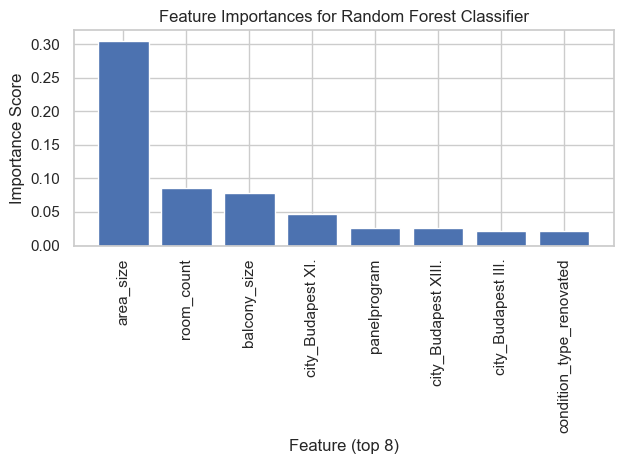

In [ ]:
# Create a Random Forest classifier
rf = RandomForestClassifier()

# Fit the classifier to your data
rf.fit(X_train, y_train)

# Get the feature importances
importances = rf.feature_importances_

# Get the indices of the features in descending order of importance
indices = np.argsort(importances)[::-1]

# Select the top 8 features
top_features_indices = indices[:8]
top_importances = importances[top_features_indices]

# Get the names of the top features
feature_names = [X_train.columns[i] for i in top_features_indices]

# Plot the top 8 feature importances with feature names
plt.figure()
plt.title("Feature Importances for Random Forest Classifier")
plt.bar(feature_names, top_importances)
plt.xticks(rotation=90)
plt.xlabel("Feature (top 8)")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()


In [ ]:
print(top_importances)

[0.30503193 0.08584998 0.07784222 0.0466752  0.0266928  0.02606244
 0.02220935 0.02134437]


In [1]:
# TRAINING SET SAMPLE SIZE VARIATIONS

# Loading the dataset
data = pd.read_csv('clean_df.csv')

# Defining the features and target variable
X = data.drop('price_interval', axis=1)
y = data['price_interval']

# Transforming labels for XGBClassifier
le = LabelEncoder()
y = le.fit_transform(y)

# Splitting the dataset into 5 subsets with different sample sizes
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.995, random_state=39)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.99, random_state=39)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y, test_size=0.95, random_state=39)
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X, y, test_size=0.9, random_state=39)
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X, y, test_size=0.8, random_state=39)
X_train_6, X_test_6, y_train_6, y_test_6 = train_test_split(X, y, test_size=0.6, random_state=39)
X_train_7, X_test_7, y_train_7, y_test_7 = train_test_split(X, y, test_size=0.5, random_state=39)
X_train_8, X_test_8, y_train_8, y_test_8 = train_test_split(X, y, test_size=0.3, random_state=39)
X_train_9, X_test_9, y_train_9, y_test_9 = train_test_split(X, y, test_size=0.2, random_state=39)
X_train_10, X_test_10, y_train_10, y_test_10 = train_test_split(X, y, test_size=0.1, random_state=39)
X_train_11, X_test_11, y_train_11, y_test_11 = train_test_split(X, y, test_size=0.05, random_state=39)

NameError: name 'pd' is not defined

In [12]:
# TRAINING SET SAMPLE SIZE VARIATIONS

# Loading the dataset
data = pd.read_csv('clean_df.csv')

# Defining the features and target variable
X = data.drop('price_interval', axis=1)
y = data['price_interval']

# Transforming labels for XGBClassifier
le = LabelEncoder()
y = le.fit_transform(y)

# Splitting the dataset into 5 subsets with different sample sizes
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, train_size=0.9, random_state=39)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, train_size=0.8, random_state=39)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y, train_size=0.7, random_state=39)
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X, y, train_size=0.5, random_state=39)
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X, y, train_size=0.4, random_state=39)
X_train_6, X_test_6, y_train_6, y_test_6 = train_test_split(X, y, train_size=0.2, random_state=39)
X_train_7, X_test_7, y_train_7, y_test_7 = train_test_split(X, y, train_size=0.1, random_state=39)
X_train_8, X_test_8, y_train_8, y_test_8 = train_test_split(X, y, train_size=0.05, random_state=39)
X_train_9, X_test_9, y_train_9, y_test_9 = train_test_split(X, y, train_size=0.01, random_state=39)
X_train_10, X_test_10, y_train_10, y_test_10 = train_test_split(X, y, train_size=0.005, random_state=39)

In [18]:
from sklearn.metrics import accuracy_score

# Initializing the model
model = XGBClassifier(subsample=1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective='multi:softmax', n_estimators=200)

# Creating a dictionary to store the results
results = {}

# Training and evaluating the model on each subset
for i, (X_train, X_test, y_train, y_test) in enumerate([(X_train_10, X_test_4, y_train_10, y_test_4),
                                                         (X_train_9, X_test_4, y_train_9, y_test_4),
                                                         (X_train_8, X_test_4, y_train_8, y_test_4),
                                                         (X_train_7, X_test_4, y_train_7, y_test_4),
                                                         (X_train_6, X_test_4, y_train_6, y_test_4),
                                                         (X_train_5, X_test_4, y_train_5, y_test_4),
                                                         (X_train_4, X_test_4, y_train_4, y_test_4),
                                                         (X_train_3, X_test_4, y_train_3, y_test_4),
                                                         (X_train_2, X_test_4, y_train_2, y_test_4),
                                                         (X_train_1, X_test_4, y_train_1, y_test_4)]):



    # Fitting the model to the training set
    model.fit(X_train, y_train)
    
    # Making predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculating the accuracy of the model
    acc = accuracy_score(y_test, y_pred)
    
    # Storing the accuracy in the results dictionary
    results[f'sample_size_{i+1}'] = acc

# Printing the results
print(results)


{'sample_size_1': 0.5450031036623215, 'sample_size_2': 0.5750051727705359, 'sample_size_3': 0.675356921166977, 'sample_size_4': 0.7117732257397061, 'sample_size_5': 0.7349472377405338, 'sample_size_6': 0.7411545623836127, 'sample_size_7': 0.7494309952410511, 'sample_size_8': 0.7618456445272088, 'sample_size_9': 0.7682598799917235, 'sample_size_10': 0.7723980964204428}


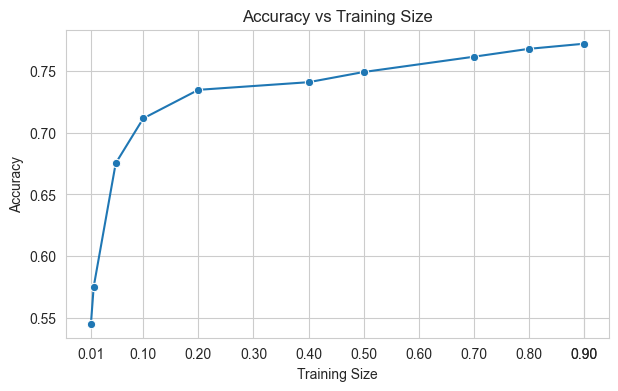

In [19]:
# Creating a dataframe from the results dictionary
df = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy'])

# Adding a column for sample size
df['Training Size'] = [0.005, 0.01, 0.05, 0.1, 0.2, 0.4, 0.5, 0.7, 0.8, 0.9]

# Creating the plot using seaborn
fig, ax = plt.subplots(figsize=(7, 4))
sns.set_style('whitegrid')
sns.lineplot(x='Training Size', y='Accuracy', data=df, marker='o')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Training Size')

# Setting the x-axis tick marks
tick_values = [(min(df['Training Size'])), 0.1, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000, 0.9, max(df['Training Size'])]
plt.xticks(tick_values, ['{:.2f}'.format(tv) for tv in tick_values])

plt.show()


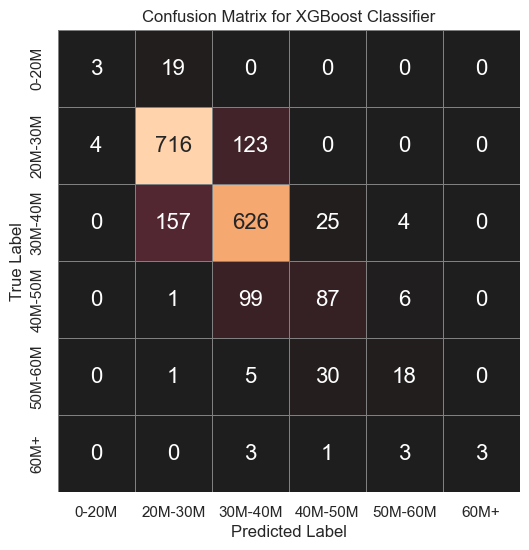

In [128]:
# CONFUSION MATRIX

# Label Encoder for XGBClassifier
le = LabelEncoder()
y = le.fit_transform(y)

# Splitting the data into training, validation and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=39)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=39)

# Defining the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier(subsample=1, learning_rate=0.1, max_depth=4, min_child_weight=3, objective='multi:softmax', n_estimators=200))
])

# Fitting the pipeline on your training data
pipeline.fit(X_train, y_train)

# Predicting on your training and test data
y_pred = pipeline.predict(X_test)

import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are your true and predicted labels, respectively
cm = confusion_matrix(y_test, y_pred)

# Creating a heatmap of the confusion matrix
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', xticklabels=['0-20M', '20M-30M', '30M-40M', '40M-50M', '50M-60M', '60M+'], yticklabels=['0-20M', '20M-30M', '30M-40M', '40M-50M', '50M-60M', '60M+'], annot_kws={"size": 16}, cbar=False, square=True, linewidths=0.5, linecolor='grey', center=0)

# Adjusting the x-axis label position
plt.xticks(ha='center')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for XGBoost Classifier')
plt.show()



In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(solver= 'sgd', max_iter=1000, learning_rate='adaptive', hidden_layer_sizes=(100,100), activation='relu', alpha=0.01, early_stopping=True))
])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


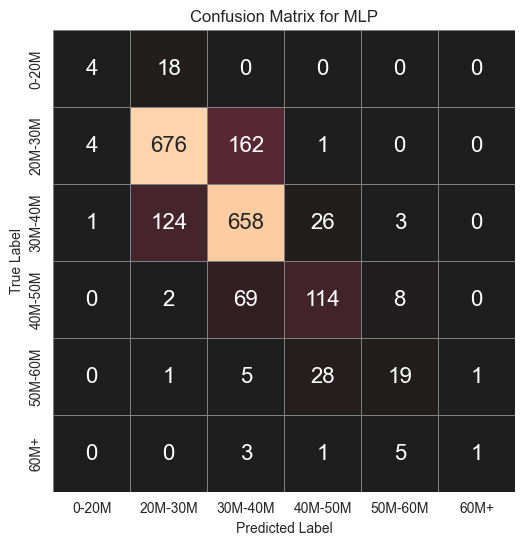

In [21]:
# CONFUSION MATRIX

# Splitting the data into training, validation and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=39)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=39)

# Defining the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(solver= 'sgd', max_iter=1000, learning_rate='adaptive', hidden_layer_sizes=(100,100), activation='relu', alpha=0.01))
])

# Fitting the pipeline on your training data
pipeline.fit(X_train, y_train)

# Predicting on your training and test data
y_pred = pipeline.predict(X_test)

import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are your true and predicted labels, respectively
cm = confusion_matrix(y_test, y_pred)

# Creating a heatmap of the confusion matrix
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', xticklabels=['0-20M', '20M-30M', '30M-40M', '40M-50M', '50M-60M', '60M+'], yticklabels=['0-20M', '20M-30M', '30M-40M', '40M-50M', '50M-60M', '60M+'], annot_kws={"size": 16}, cbar=False, square=True, linewidths=0.5, linecolor='grey', center=0)

# Adjusting the x-axis label position
plt.xticks(ha='center')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for MLP')
plt.show()

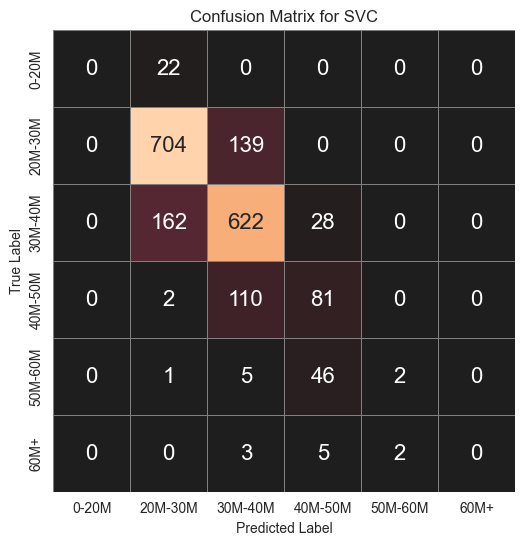

In [22]:
# CONFUSION MATRIX

# Splitting the data into training, validation and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=39)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=39)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('sv', SVC(kernel= 'poly', gamma= 'scale', degree= 3, coef0= 1, C= 0.1))
])

# Fitting the pipeline on your training data
pipeline.fit(X_train, y_train)

# Predicting on your training and test data
y_pred = pipeline.predict(X_test)

import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are your true and predicted labels, respectively
cm = confusion_matrix(y_test, y_pred)

# Creating a heatmap of the confusion matrix
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', xticklabels=['0-20M', '20M-30M', '30M-40M', '40M-50M', '50M-60M', '60M+'], yticklabels=['0-20M', '20M-30M', '30M-40M', '40M-50M', '50M-60M', '60M+'], annot_kws={"size": 16}, cbar=False, square=True, linewidths=0.5, linecolor='grey', center=0)

# Adjusting the x-axis label position
plt.xticks(ha='center')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVC')
plt.show()